<a href="https://colab.research.google.com/github/ravikumar8709/Spam-mail-classifier/blob/main/smaildetection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [ ]:
df['message'] = df['message'].str.lower()

In [ ]:
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [ ]:
# checing null values
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [ ]:
df.fillna(df['subject'].mode().values[0],inplace=True)

In [ ]:
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [ ]:
df['sub_mssg']=df['subject']+df['message']
df.head()

,subject,message,label,sub_mssg
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...


In [ ]:
df['sub_mssg'].describe()

count                                                  2893
unique                                                 2876
top       re := 20 the virtual girlfriend and virtual bo...
freq                                                      4
Name: sub_mssg, dtype: object

In [ ]:
df['length']=df['sub_mssg'].apply(len)
df.head()

,subject,message,label,sub_mssg,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [ ]:

df.drop('subject',axis=1,inplace=True)

In [ ]:

df.head()

,message,label,sub_mssg,length
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


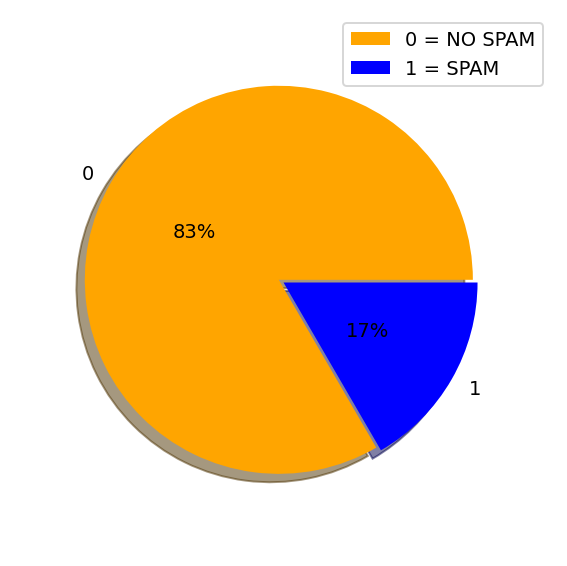

In [ ]:
lb=df['label'].value_counts().index.tolist()
val=df['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()


In [ ]:
df['message'][0]

"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and

In [ ]:
import re

In [ ]:
def decontact(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
mssg=decontact(df['message'][70])
mssg

'hi , i am new to the list . and since english is not my first language , i apologize for the mistakes you might find below : - ) . i hope that you will not mind if some of my explanations are in french . for my ph . d . semiotics , i am writing a dissertation on discourse and science-fiction and i need some information about the construction of neologisms in french and in english . ( neologisms are useful in sf , specially in the scientific field ! ) in french , neologisms are made in 5 different ways ( i hope these are the right english words ) : derivation ; composition ; imitation ; pure invention ; amalgam . one might also add borrowings from other languages . here are some examples ( sorry , the explanations are in french ) : - derivation : mot derive : " position " peut produire le verbe " positionner " ; - composition : mot compose : si " monotone " est decompose ( " mono " / " tone " ) , on peut recomposer " polytone " ; a partir de " telephone " on peut produire en science-fi

In [ ]:
#REPLACING NUMBERS
df['sub_mssg']=df['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers')
df['sub_mssg'][0]

"job posting - apple-iss research centercontent - length : numbers apple-iss research center a us $ numbers million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statis

In [ ]:
#CONVRTING EVERYTHING TO LOWERCASE
df['sub_mssg']=df['sub_mssg'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['sub_mssg']=df['sub_mssg'].str.replace(r'\n'," ")
# REPLACING EMAIL IDs BY 'MAILID'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['sub_mssg']=df['sub_mssg'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [ ]:
#CONVRTING EVERYTHING TO LOWERCASE
df['message']=df['message'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['message']=df['message'].str.replace(r'\n'," ")
# REPLACING EMAIL IDs BY 'MAILID'
df['message']=df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['message']=df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['message']=df['message'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['message']=df['message'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['message']=df['message'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['message']=df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE
df['message']=df['message'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [ ]:
df['sub_mssg'][0]

'job posting apple iss research centercontent length numbers apple iss research center a us Money numbers million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state of the art corpus based n gram language models cache language models and part of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowl

In [ ]:
df.head()

,message,label,sub_mssg,length
0,content length 3386 apple iss research center ...,0,job posting apple iss research centercontent l...,2895
1,lang classification grimes joseph e and barbar...,0,sociolinguisticslang classification grimes jos...,1816
2,i am posting this inquiry for sergei atamas sa...,0,query letter frequencies for text identificati...,1485
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [ ]:
import nltk
nltk.download('stopwords')
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
# removing stopwords
stop = stopwords.words('english')
df['Cleaned_Text'] = df['sub_mssg'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,message,label,sub_mssg,length,Cleaned_Text
0,content length 3386 apple iss research center ...,0,job posting apple iss research centercontent l...,2895,job posting apple iss research centercontent l...
1,lang classification grimes joseph e and barbar...,0,sociolinguisticslang classification grimes jos...,1816,sociolinguisticslang classification grimes jos...
2,i am posting this inquiry for sergei atamas sa...,0,query letter frequencies for text identificati...,1485,query letter frequencies text identificationi ...
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328,riska colleague researching differing degrees ...
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070,request book informationearlier morning phone ...


In [ ]:
df.drop('message',axis=1,inplace=True)

In [ ]:
df.drop('sub_mssg',axis=1,inplace=True)

In [ ]:
df.head()

,label,length,Cleaned_Text
0,0,2895,job posting apple iss research centercontent l...
1,0,1816,sociolinguisticslang classification grimes jos...
2,0,1485,query letter frequencies text identificationi ...
3,0,328,riska colleague researching differing degrees ...
4,0,1070,request book informationearlier morning phone ...


In [ ]:
df.isnull().sum()

label           0
length          0
Cleaned_Text    0
dtype: int64

In [ ]:
df['lgth_clean']=df['Cleaned_Text'].apply(len)
df.head()

,label,length,Cleaned_Text,lgth_clean
0,0,2895,job posting apple iss research centercontent l...,2108
1,0,1816,sociolinguisticslang classification grimes jos...,1506
2,0,1485,query letter frequencies text identificationi ...,1150
3,0,328,riska colleague researching differing degrees ...,216
4,0,1070,request book informationearlier morning phone ...,653


In [ ]:
original_length=sum(df['length'])
after_cleaning=sum(df['lgth_clean'])

In [ ]:
print("original_length",original_length)
print('after_cleaning',after_cleaning)

original_length 9437398
after_cleaning 6847913


In [ ]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.pipeline import Pipeline

In [ ]:
#logistic regression
tvec = TfidfVectorizer()
lr = LogisticRegression(solver = "lbfgs")

In [ ]:
X = df.Cleaned_Text
Y = df.label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 225,stratify=Y)

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',lr)])

model.fit(X_train,Y_train)


from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

confusion_matrix(y_pred,Y_test)

array([[242,   8],
       [  0,  40]])

In [ ]:
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

Accuracy :  0.9724137931034482
Precision :  0.9770114942528735
Recall :  0.9724137931034482


In [ ]:
#knn classifier
knc = KNeighborsClassifier()
model_1 = Pipeline([('vectorizer',tvec),('classifier',knc)])
model_1.fit(X_train,Y_train)


y_pred = model_1.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[231   2]
 [ 11  46]]
Accuracy :  0.9551724137931035
Precision :  0.9552899686520375
Recall :  0.9551724137931035


In [ ]:
#ada boost classifier
abc = AdaBoostClassifier()
model_3 = Pipeline([('vectorizer',tvec),('classifier',abc)])
model_3.fit(X_train,Y_train)


y_pred = model_3.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[241   3]
 [  1  45]]
Accuracy :  0.9862068965517241
Precision :  0.9866094328868624
Recall :  0.9862068965517241


In [ ]:
#naive bayes
mnb = MultinomialNB()
model_5 = Pipeline([('vectorizer',tvec),('classifier',mnb)])
model_5.fit(X_train,Y_train)


y_pred = model_5.predict(X_test)

print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[242  37]
 [  0  11]]
Accuracy :  0.8724137931034482
Precision :  0.9707614942528735
Recall :  0.8724137931034482


In [ ]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
model_6= Pipeline([('vectorizer',tvec),('classifier',gbc)])
model_6.fit(X_train,Y_train)


y_pred = model_6.predict(X_test)
print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[241   8]
 [  1  40]]
Accuracy :  0.9689655172413794
Precision :  0.9728887622304552
Recall :  0.9689655172413794


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(random_state=42)
model_7 = Pipeline([('vectorizer',tvec),('classifier',rfc)])

model_7.fit(X_train,Y_train)

y_pred = model_7.predict(X_test)
print(confusion_matrix(y_pred,Y_test))
print("Accuracy : ", accuracy_score(y_pred,Y_test))
print("Precision : ", precision_score(y_pred,Y_test, average = 'weighted'))
print("Recall : ", recall_score(y_pred,Y_test, average = 'weighted'))

[[242   5]
 [  0  43]]
Accuracy :  0.9827586206896551
Precision :  0.9845545977011494
Recall :  0.9827586206896551


In [ ]:
#testing model
result=model_7.predict(['your microsoft account has been compromised ,you must update before or else your account going to close click to update'])
result

array([0])

In [ ]:
result=model_7.predict(['Today we want to inform you that the application period for 15.000 free Udacity Scholarships in Data Science is now open! Please apply by November 16th, 2020 via https://www.udacity.com/bertelsmann-tech-scholarships.'])
result

array([1])

here 1 is spam and 0 is normal mail

In [ ]:
result=model_7.predict(["content - length : 2116 university of salford , uk european studies research institute ( esri ) centre for language and linguistics seminar programme 1995 the following seminars have been planned : wednesday 22 february ` what 's the use of dictionaries ? ' reinhard hartmann , essex monday 27 february ` first steps in learning french : a study of ( 5 . 30pm ) progression in the secondary school ' ros mitchell , southampton wednesday 8 march ` the nature of translation ' stephen thomas , salford wednesday 15 march ` the variational approach in translation ' myriam carr , salford wednesday 22 march ` the unit of translation ' michel ballard , artois wednesday 10 may ` pragmatic factors in syntactic change : a r&g college spanish case study ' christopher pountain , cambridge wednesday 17 may ` proper nouns , generics , and the count-mass r&g college distinction ' christopher lyons , salford seminars will take place at 4 . 30 in room g21 , crescent house , university of salford unless otherwise indicated . for further information , contact charlotte hoffmann , associate director , centre of language and linguistics , esri . tel : + 44 161 745 5990"])
result

array([0])

In [ ]:
result=model_7.predict(["second call ( < < second call < < < second call < < < second call < < < second call 5th toulouse international workshop time , space and movement - - - - - meaning and knowledge in the sensible world organized by the ` ` langue , raisonnement , calcul ' ' group irit , universite paul sabatier toulouse erss , universite de toulouse - le mirail cnrs ura 1399 , ura 1033 chateau de bonas in gascony , france 23-27 june , 1995 ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ call for papers ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ this workshop will be the fifth one in a series which began in 1989 . like previous editions , it aims at gathering researchers from a variety of fields around the themes of the semantics of time , space and movement , in a castle in the middle of the beautiful landscape of gascony . unlike previous ones , though , next year 's workshop will not gather only invited researchers , but will be open to participants submitting a contribution . wishing to preserve the friendly and cheerful atmosphere that characterized the series , we will limit the number of participants to 50 , and will achieve a balance between invited talks and submitted contributions . motivations ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ when natural language utterances are about sensible world , the computation of the spatial and spatio-temporal reference plays a major part in the construction of their formal representation . if the understanding of a discourse is the ability to infer adequate answers to questions about its informational content , the ability to deduce properties of the discourse objects ( like their localisation , their structure or their shape ) from the discourse representation , allows the cognitive validation of these representations . the most recent works in discourse theory ( drt , sdrt ) clearly show the necessity to take into account , in addition to linguistic and pragmatic information , common knowledge about the universe of discourse . in its whole generality , the formal representation of this component of the meaning can very well be hopeless . we propose to focus the attention on a specific category of discourses , namely discourses which refer to the sensible world . in this case , common knowledge reflects the structure and the properties of mental representations of space , movement and time , these representations being available not only through the analysis of linguistic expressions but also through the analysis of different forms of reasoning and decision-taking associated with perception . topics of interest ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ we propose to discuss the possible contributions of spatial and spatio-temporal knowledge representation and reasoning to discourse interpretation ; as well as the possible contributions of the analysis of time , space and movement in language to the comprehension of the organization of the perceived objects , and to the identification of their cognitively relevant properties . contributions are invited on substantial and original research on various aspects of time , space and movement , including , but not limited to , the following . a . semantics of time , space and movement in natural language - lexical semantics : from linguistic and conceptual description to formalisation - from lexicon to sentence and discourse : role of the spatial and spatio-temporal ( s & st ) common-sense knowledge in discourse interpretation - logics and deductive mechanisms : * for the computation of the s & st reference * for the cognitive validation of discourse representations b . knowledge representation and s & st reasoning - ontology of s & st entities : philosophical analysis and formalisation - mental representations of space , time and movement - mathematics of the sensible world - naive physics , qualitative s & st reasoning - logics and visual reasoning - contributions to discourse representation c . relations between language and perception - imaginal and / or propositional structures of mental representations - from language to visual perception : from propositional to numerical structures ( image synthesis ) - from visual perception to language : from numerical to propositional structures ( image interpretation ) - mathematical and logical problems of hybrid reasoning invited speakers ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ nicholas asher , linguistics and philosophy , austin patrick blackburn , logic and computational linguistics , saarbruecken mimo caenepeel * , linguistics , edinburgh anthony cohn , artificial intelligence , leeds john etchemendy , philosophy , stanford luis farinas del cerro , logics and computer science , toulouse christian freksa * , cognitive science , hamburg christopher habel * , cognitive science , hamburg patrick hayes * , artificial intelligence , urbana gerd herzog , artificial intelligence , saarbruecken hans kamp * , linguistics and philosophy , stuttgart manfred krifka , linguistics , austin carlota smith , linguistics , austin barbara tversky * , psychology , stanford claude vandeloise , linguistics , baton - rouge achille varzi , philosophy , trento henk verkuyl , linguistics , utrecht co vet , linguistics , groningen ( * ) to be confirmed programme committee ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ chair : mario borillo , artificial intelligence , toulouse nicholas asher , linguistics and philosophy , austin patrick blackburn , logics and computational linguistics , saarbruecken andree borillo , linguistics , toulouse anthony cohn , artificial intelligence , leeds john etchemendy , philosophy , stanford patrick hayes , artificial intelligence , urbana carlota smith , linguistics , austin barbara tversky , psychology , stanford achille varzi , philosophy , trento co vet , linguistics , groningen laure vieu , artificial intelligence , toulouse format for submission ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ submitted papers should be at most 12 pages in length and be produced in 12pt ( default latex article style is ok ) . submissions should provide the affiliation , full postal address , telephone and fax numbers , and e-mail address ( if any ) of the author ( s ) . a few words stating the position of the paper with respect to the topics of interest would be useful , as well as a 100-200 word abstract . electronic submission ( plain ascii , latex , uuencoded postscript , or binhex mac word files ) is recommended . they should be sent to tsm @ irit . fr before 10 february 1995 . hard - copy submissions ( 4 copies ) should reach the programme chair no late than 10 february 1995 . notification of acceptance will be sent to authors by 10 april , 1995 , and final versions ( camera-ready ) will be due by 15 may , 1995 . these will be compiled as workshop notes to be distributed to the participants . schedule ~ ~ ~ ~ ~ ~ ~ ~ papers submission . . . . . . . . . . . . . . . 10 february , 1995 notification of acceptance . . . . . . 10 april , 1995 final version due . . . . . . . . . . . . . . . 15 may , 1995 workshop . . . . . . . . . . . . . . . . . . . . . . . . 23-27 june , 1995 organization ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ organizing committee : pascal amsili , irit michel aurnague , erss andree borillo , erss mario borillo , irit myriam bras - grivart , irit pierre sablayrolles , irit laure vieu , irit contact : tsm ' 95 c / o mario borillo irit - universite paul sabatier 118 , route de narbonne , f-31062 toulouse cedex france tel : ( + 33 ) 61 . 55 . 60 . 91 fax : ( + 33 ) 61 . 55 . 83 . 25 e - mail : tsm @ irit . fr www : http : / / www . irit . fr / activites / eq _ lrc / tsm95 . html"])
result

array([0])

In [ ]:
result=model_7.predict(["content - length : 1717 call for papers 7th international systemic functional workshop ' language as choice ' 26 - 29 july 1995 university of valencia , spain call for papers abstracts are invited for papers ( 20 minutes will be allowed for each presentation , with 10 minutes extra for questions and discussion ) on any aspect appropriate to the title language as choice . papers may have a highly specific focus , or be on more general topics ; workshop proposals are particularly encouraged . a one-page abstract should be submitted by 10 february 1195 . ( the deadline has been extended ) . notification of abstracts accepted will be given by 15 march 1995 . mailing address : dr . antonia sanchez depto . filologia inglesa y alemana facultad de filologia universitat de valencia blasco ibanez 28 46010 valencia tel : + 34 6 3864262 fax : + 34 6 3864161 e . mail : sanchezma @ mac . uv . es for any further information , please contact the above address"])
result

array([0])

In [ ]:
result = model_7.predict(["call for papers linguistics session - - midwest modern language association , st . louis , missouri , november 2 - 4 , 1995 topic : dialogue in fiction - - applications of theories / approaches from linguistic and cognitive sciences to dialogue in fiction . papers may explain how dialogue in fiction works ( with or without comparison to real conversation ) ; revise existing theories of language use , and perhaps offer new ones , based on analysis of dialogue in fiction ; or interpret texts through dialogue . please send abstracts or papers to : deborah f . rossen - knill , institute for research in cognitive science , 3401 walnut street , suite 4c , philadelphia , pa 19104-6228 . deadline : march 27 , 1995 questions ? contact deborah f . rossen - knill : drossen @ linc . cis . upenn . edu ."])
result

array([0])

In [ ]:
result = model_7.predict(["call for papers linguistics session - - midwest modern language association , st . louis , missouri , november 2 - 4 , 1995 topic : dialogue in fiction - - applications of theories / approaches from linguistic and cognitive sciences to dialogue in fiction . papers may explain how dialogue in fiction works ( with or without comparison to real conversation ) ; revise existing theories of language use , and perhaps offer new ones , based on analysis of dialogue in fiction ; or interpret texts through dialogue . please send abstracts or papers to : deborah f . rossen - knill , institute for research in cognitive science , 3401 walnut street , suite 4c , philadelphia , pa 19104-6228 . deadline : march 27 , 1995 questions ? contact deborah f . rossen - knill : drossen @ linc . cis . upenn . edu ."])
result

array([0])

In [ ]:
result = model_7.predict(["call for papers linguistics session - - midwest modern language association , st . louis , missouri , november 2 - 4 , 1995 topic : dialogue in fiction - - applications of theories / approaches from linguistic and cognitive sciences to dialogue in fiction . papers may explain how dialogue in fiction works ( with or without comparison to real conversation ) ; revise existing theories of language use , and perhaps offer new ones , based on analysis of dialogue in fiction ; or interpret texts through dialogue . please send abstracts or papers to : deborah f . rossen - knill , institute for research in cognitive science , 3401 walnut street , suite 4c , philadelphia , pa 19104-6228 . deadline : march 27 , 1995 questions ? contact deborah f . rossen - knill : drossen @ linc . cis . upenn . edu ."])
result

array([0])

In [ ]:
result=model_7.predict(["""authenticated sender is subject : ( + ( + bull _ s * eye * targeting * software + ) + ) mime - version : 1 . 0 content - type : text / plain ; charset = " us-ascii " content - transfer - encoding : 7bit email marketing works ! ! bull 's eye gold is the premier email address collection tool . this program allows you to develop targeted lists of email addresses . doctors , florists , mlm , biz opp , . . . you can collect anything . . . you are only limited by your imagination ! you can even collect email addresses for specific states , cities , and even countries ! all you need is your web browser and this program . our software utilizes the latest in search technology called " spidering " . by simply feeding the spider program a starting website it will collect for hours . the spider will go from website to targeted website providing you with thousands upon thousands of fresh targeted email addresses . when you are done collecting , the spider removes duplicates and saves the email list in a ready to send format . no longer is it necessary to send millions of ads to get a handful of responses . . . send less . . . earn more ! ! ! a terrific aspect of the bull 's eye software is that there is no difficult set up involved and no special technical mumbo-jumbo to learn . all you need to know is how to search for your targeted market in one of the many search engines and let the spider do the rest ! not familiar with the search engines ? no problem , we provide you with a list of all the top search engines . just surf to the location of a search engine on your browser then search for the market you wish to reach . . . it 's that easy ! for instance if you were looking for email addresses of doctors in new york all you would do is : 1 ) do a search using your favorite search engine by typing in the words doctor ( s ) and new york 2 ) copy the url ( one or more ) . . . that 's the stuff after the http : / / . . . for instance it might look like http : / / www . yahoo . com / ? doctor ( s ) / ? new + york 3 ) press the start button that 's it ! ! ! the bull 's eye spider will go to all the websites that are linked , automatically extracting the email addresses you want . the spider is passive too ! that means you can let it run all day or all night while you are working on important things or just having fun on your computer . there is no need to keep a constant watch on it , just feed it your target market and give it praise when it delivers thousands of email addresses at the end of the day ! features of the bull 's eye software : * does targeted searches of websites collecting the email addresses you want ! * collects email addresses by city , state , even specific countries * runs automatically . . . simply enter the starting information , press the start button , and it does the rest * filters out duplicates * keeps track of urls already visited * can run 24 hours per day , 7 days per week * fast and easy list management * also has built in filtering options . . . you can put in words that it " must " have while searching , . . . you can even put in criteria that it " must not have " . . . giving you added flexibility * also imports email addresses from any kind of files ( text files , binary files , database files ) * list editor handles multiple files to work on many lists simultaneously * has a black - book feature . . . avoid sending emails to people who do not want to receive it * built - in mail program . . . send email directly on the internet with just a click of your mouse * personalized emails . . . if the email address has the user 's name when it is collected , . . you can send personalized emails ! ! ! * sort by location , server , user name , contact name * advanced operations : email address lists export in many different formats ( html , comma delimited , text file ) advanced editing . . . transfer , copy , addition , delete , crop , move to top / bottom operations between lists . . . union , subtraction , comparison * program is passive , . . . meaning you can run other programs at the same time call for more information 213-980 - 7850 call for more information 213-980 - 7850 ordering information customer name company name address city state zip phone fax email address _ _ _ _ _ _ bull ' s eye software $ 259 . 00 includes software , instructions , technical support _ _ _ _ _ _ shipping & handling ( 2 - 3 day fedex ) $ 10 . 00 ( fedex overnite ) $ 20 . 00 _ _ _ _ _ _ total ( ca residents add applicable sales tax ) * all orders are for win 95 and win nt * * * * * credit cards accepted * * * * * mastercard visa amex please call 213-980 - 7850 to process your order 9am - 5pm pacific time checks or money orders send to : bull 's eye software inc . 5670 wilshire blvd . suite 2170 los angeles , ca 90036 please note : allow 5 business days for all checks to clear before order is shipped . * if you would like your email address removed , please write us at the above address ."""])

result

array([1])

In [ ]:
result = model_7.predict(["""authenticated sender is subject : ( + ( + bull _ s * eye * targeting * software + ) + ) mime - version : 1 . 0 content - type : text / plain ; charset = " us-ascii " content - transfer - encoding : 7bit email marketing works ! ! bull 's eye gold is the premier email address collection tool . this program allows you to develop targeted lists of email addresses . doctors , florists , mlm , biz opp , . . . you can collect anything . . . you are only limited by your imagination ! you can even collect email addresses for specific states , cities , and even countries ! all you need is your web browser and this program . our software utilizes the latest in search technology called " spidering " . by simply feeding the spider program a starting website it will collect for hours . the spider will go from website to targeted website providing you with thousands upon thousands of fresh targeted email addresses . when you are done collecting , the spider removes duplicates and saves the email list in a ready to send format . no longer is it necessary to send millions of ads to get a handful of responses . . . send less . . . earn more ! ! ! a terrific aspect of the bull 's eye software is that there is no difficult set up involved and no special technical mumbo-jumbo to learn . all you need to know is how to search for your targeted market in one of the many search engines and let the spider do the rest ! not familiar with the search engines ? no problem , we provide you with a list of all the top search engines . just surf to the location of a search engine on your browser then search for the market you wish to reach . . . it 's that easy ! for instance if you were looking for email addresses of doctors in new york all you would do is : 1 ) do a search using your favorite search engine by typing in the words doctor ( s ) and new york 2 ) copy the url ( one or more ) . . . that 's the stuff after the http : / / . . . for instance it might look like http : / / www . yahoo . com / ? doctor ( s ) / ? new + york 3 ) press the start button that 's it ! ! ! the bull 's eye spider will go to all the websites that are linked , automatically extracting the email addresses you want . the spider is passive too ! that means you can let it run all day or all night while you are working on important things or just having fun on your computer . there is no need to keep a constant watch on it , just feed it your target market and give it praise when it delivers thousands of email addresses at the end of the day ! features of the bull 's eye software : * does targeted searches of websites collecting the email addresses you want ! * collects email addresses by city , state , even specific countries * runs automatically . . . simply enter the starting information , press the start button , and it does the rest * filters out duplicates * keeps track of urls already visited * can run 24 hours per day , 7 days per week * fast and easy list management * also has built in filtering options . . . you can put in words that it " must " have while searching , . . . you can even put in criteria that it " must not have " . . . giving you added flexibility * also imports email addresses from any kind of files ( text files , binary files , database files ) * list editor handles multiple files to work on many lists simultaneously * has a black - book feature . . . avoid sending emails to people who do not want to receive it * built - in mail program . . . send email directly on the internet with just a click of your mouse * personalized emails . . . if the email address has the user 's name when it is collected , . . you can send personalized emails ! ! ! * sort by location , server , user name , contact name * advanced operations : email address lists export in many different formats ( html , comma delimited , text file ) advanced editing . . . transfer , copy , addition , delete , crop , move to top / bottom operations between lists . . . union , subtraction , comparison * program is passive , . . . meaning you can run other programs at the same time call for more information 213-980 - 7850 call for more information 213-980 - 7850 ordering information customer name company name address city state zip phone fax email address _ _ _ _ _ _ bull ' s eye software $ 259 . 00 includes software , instructions , technical support _ _ _ _ _ _ shipping & handling ( 2 - 3 day fedex ) $ 10 . 00 ( fedex overnite ) $ 20 . 00 _ _ _ _ _ _ total ( ca residents add applicable sales tax ) * all orders are for win 95 and win nt * * * * * credit cards accepted * * * * * mastercard visa amex please call 213-980 - 7850 to process your order 9am - 5pm pacific time checks or money orders send to : bull 's eye software inc . 5670 wilshire blvd . suite 2170 los angeles , ca 90036 please note : allow 5 business days for all checks to clear before order is shipped . * if you would like your email address removed , please write us at the above address .
"""])
result

array([1])

In [ ]:
result = model_7.predict(["Hi, I am Avi .welcome to the colab"])
result

array([0])